#   E-Commerce Product Return Analysis – Data Cleaning & Preparation

##  Introduction
This project focuses on analyzing and reducing product return rates in an e-commerce business. By understanding the patterns behind returned products, we aim to provide data-driven insights that help the company improve product quality, optimize marketing, and enhance customer satisfaction.

The goal of this step is to clean and prepare the dataset for visualizationg. This involves handling missing values.



##  Dataset Description

The dataset used in this project is a **synthetic e-commerce returns dataset** sourced from [Kaggle](https://www.kaggle.com/).  


In [1]:
pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Step 1: Import Dataset into Python

In [2]:
import pandas as pd

df = pd.read_csv("ecommerce_returns_synthetic_data.csv")
df.head()



,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,Clothing,411.59,3,Changed mind,Returned,387.0,58,Male,City54,Debit Card,Next-Day,45.27
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Books,288.88,3,Wrong item,Returned,31.0,68,Female,City85,Credit Card,Express,47.79
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaN,Toys,390.03,5,NaN,Not Returned,NaN,22,Female,City30,Debit Card,Next-Day,26.64
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaN,Toys,401.09,3,NaN,Not Returned,NaN,40,Male,City95,PayPal,Next-Day,15.37
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaN,Books,110.09,4,NaN,Not Returned,NaN,34,Female,City80,Gift Card,Standard,16.37


# Step 2: Clean & Prepare the Data
# 1. Remove duplicates & nulls        

In [5]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


# 2.  Convert dates

In [9]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Return_Date'] = pd.to_datetime(df['Return_Date'])


# 3. Create ReturnDays

In [13]:
df['Days_to_Return'] = (df['Return_Date'] - df['Order_Date']).dt.days
df['Days_to_Return'] = df['Days_to_Return'].round().astype('Int64')


# 4. Create target column

In [11]:
df.rename(columns={
    'Return_Status': 'IsReturned',
    'Return_Date': 'ReturnDate',
    'Days_to_Return': 'ReturnDays'
}, inplace=True)
df.head()



,Order_ID,Product_ID,User_ID,Order_Date,ReturnDate,Product_Category,Product_Price,Order_Quantity,Return_Reason,IsReturned,ReturnDays,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,Clothing,411.59,3,Changed mind,Returned,387,58,Male,City54,Debit Card,Next-Day,45.27
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Books,288.88,3,Wrong item,Returned,31,68,Female,City85,Credit Card,Express,47.79
5,ORD00000005,PROD00000005,USER00000005,2024-02-14,2024-09-22,Electronics,252.12,1,Defective,Returned,221,46,Female,City47,Debit Card,Next-Day,47.61
6,ORD00000006,PROD00000006,USER00000006,2023-05-29,2023-08-03,Clothing,382.89,2,Wrong item,Returned,66,25,Male,City50,Credit Card,Express,28.49
7,ORD00000007,PROD00000007,USER00000007,2023-02-09,2024-08-01,Electronics,306.39,3,Not as described,Returned,539,67,Female,City39,Credit Card,Express,38.91


# Step 3: Exploratory Data Analysis (EDA)
## Analyze Return Rate by:

In [26]:

# Category-wise return rate
category_return = df.groupby('Product_Category')['IsReturned'].mean()

# Location-wise return rate
location_return = df.groupby('User_Location')['IsReturned'].mean()


## Visualize:

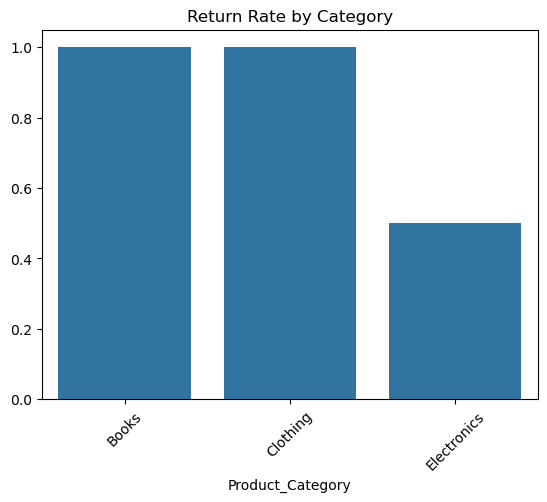

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=category_return.index, y=category_return.values)
plt.title("Return Rate by Category")
plt.xticks(rotation=45)
plt.show()


# Step 4: Train Logistic Regression Model

In [39]:
features = ['Product_Category', 'Product_Price', 'Discount_Applied', 'User_Location']
X = df_model[features]
y = df_model['IsReturned']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## predicted probabilities: 

In [41]:

df['Return_Probability'] = model.predict_proba(X)[:,1]
df.to_csv("model_output.csv", index=False)



# Objective of this Notebook
- Clean the raw dataset and ensure data quality
- Save the cleaned dataset for Power BI 